In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
class HelperFunctions:
    @staticmethod
    def mean(x):
        n = x.shape[0]
        return x.sum() / n
    
    @staticmethod
    def covariance(x, y):
        n = x.shape[0]
        xy_mean = np.multiply(x, y).sum() / n
        x_mean = HelperFunctions.mean(x)
        y_mean = HelperFunctions.mean(y)
        return xy_mean - x_mean*y_mean
    
    @staticmethod
    def polynomial_val(x, coeffs):
        n = len(coeffs)
        coeffs = coeffs[::-1]
        return sum([coeffs[i]*pow(x, i) for i in range(0, n)])

In [3]:
class LinearRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.beta1dash = HelperFunctions.covariance(x, y) / \
                np.var(x)
        self.beta0dash = HelperFunctions.mean(y) - self.beta1dash * \
                HelperFunctions.mean(x)
        self.coeffs = np.array([self.beta1dash, self.beta0dash])
        
    def predict(self, x):
        return HelperFunctions.polynomial_val(x, self.coeffs)
    
    def error(self):
        y_hat = np.array([self.predict(i) for i in self.x])
        return np.subtract(self.y, y_hat)
    
    def sse(self):
        y_hat = np.array([self.predict(i) for i in self.x])
        e = np.subtract(self.y, y_hat)
        return np.power(e, 2).sum()
    
    def ssr(self):
        y_hat = np.array([self.predict(i) for i in self.x])
        return np.power(np.subtract(y_hat, HelperFunctions.mean(self.y)), 2).sum()
    
    def r_sqrd(self):
        ssr = self.ssr()
        sse = self.sse()
        sst = ssr + sse
        return ssr/sst
    
    def plot(self):
        delta = 1
        pts = list()
        i = min(self.x)
        while i<=max(self.x):
            pts.append(i)
            i += delta
        line_vals = [self.predict(i) for i in pts]
        plt.scatter(self.x, self.y)
        plt.plot(pts, line_vals)
        plt.show()

# Problem 1: PPT example

In [4]:
class Problem1:
    x = np.array([50, 53, 54, 55, 56, 59, 62, 65, 67, 71, 72,
        74, 75, 76, 79, 80, 82, 85, 87, 90, 93, 94,
        95, 97, 100])
    
    y = np.array([122, 118, 128, 121, 125, 136, 144, 142, 149,
        161, 167, 168, 162, 171, 175, 182, 180, 183,
        188, 200, 194, 206, 207, 210, 219])

In [5]:
lr = LinearRegression(Problem1.x, Problem1.y)

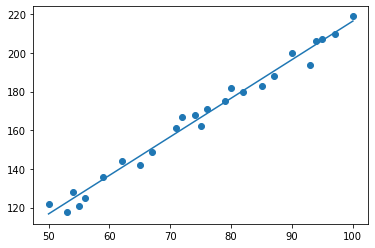

In [6]:
lr.plot()

In [7]:
e = lr.error()
print(f'Errors: {e}')

Errors: [ 5.23998479 -4.74552062  3.25931091 -5.73585756 -3.73102603  1.28346856
  3.29796315 -4.68754226 -1.6778792   2.34144692  6.34627845  3.35594151
 -4.63922696  2.36560458  0.38009917  5.3849307  -0.60540624 -3.59091165
 -2.58124859  3.433246   -8.55225941  1.45257212  0.45740365 -0.53293329
  2.4815613 ]


In [8]:
sse = lr.sse()
print(f'SSE: {sse}')

SSE: 371.6274228082034


In [9]:
ssr = lr.ssr()
print(f'SSR: {ssr}')

SSR: 22607.812577191675


In [10]:
r_sqrd = lr.r_sqrd()
print(f'R^2: {r_sqrd}')

R^2: 0.9838278294506652


# Problem 2: Appliance energy prediction

In [12]:
class Problem2:
    data_path = Path('machine.csv')
    x_cols = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
    y_col = 'PRP'

In [ ]:
df = pd.read_csv(Problem2.data_path)
df.head()

SSE: 4872826.59539628 R^2: 0.09431007040649202


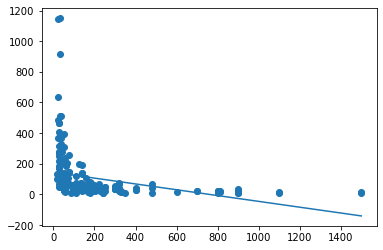

SSE: 1980380.0885253032 R^2: 0.6319158361515627


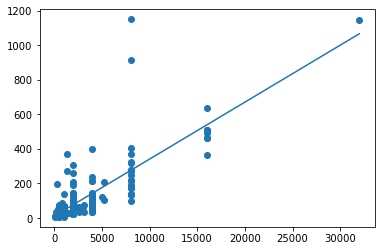

SSE: 1373165.0050224871 R^2: 0.7447761186712324


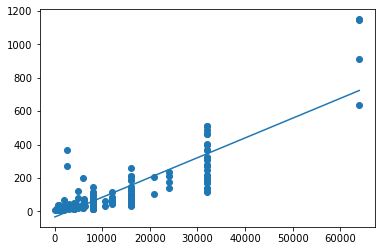

SSE: 3017809.11994711 R^2: 0.4390936603502788


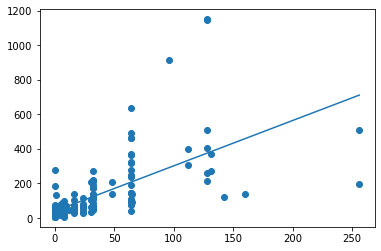

SSE: 3385443.154435289 R^2: 0.3707632085491917


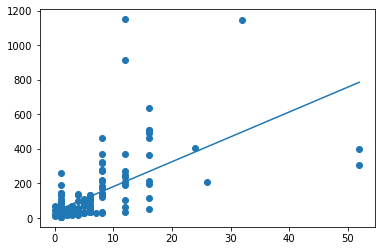

SSE: 3409573.0899637216 R^2: 0.3662782881068174


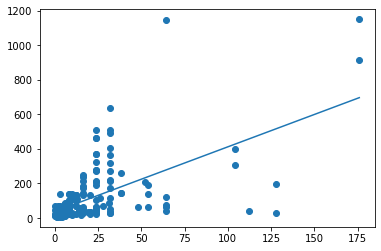

In [13]:
y = df[Problem2.y_col]

for x_col in Problem2.x_cols:
    x = df[x_col]
    lr = LinearRegression(x, y)
    sse = lr.sse()
    r_sqrd = lr.r_sqrd()
    print(f'SSE: {sse} R^2: {r_sqrd}')
    lr.plot()c